In [2]:
import pandas as pd
from sklearn import preprocessing as pp 

data = pd.read_csv("../../data/ds_salaries.csv")

data = data[["work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size"]]

data = pd.get_dummies(data, columns=["experience_level"])

le = pp.LabelEncoder()
data["company_location"] = le.fit_transform(data["company_location"])

data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,12,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,29,S,0,0,0,1
2,2020,109024,Big Data Engineer,18,M,0,0,0,1
3,2020,20000,Product Data Analyst,20,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,48,L,0,0,0,1
...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,48,M,0,0,0,1
603,2022,126000,Data Engineer,48,M,0,0,0,1
604,2022,129000,Data Analyst,48,M,0,0,0,1
605,2022,150000,Data Analyst,48,M,0,0,0,1


In [3]:
df_array = data["company_location"].values.reshape(-1,1)
data["company_location"] = pp.normalize(df_array,axis=0)
data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,0.012393,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,0.029950,S,0,0,0,1
2,2020,109024,Big Data Engineer,0.018590,M,0,0,0,1
3,2020,20000,Product Data Analyst,0.020655,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,0.049573,L,0,0,0,1
...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,0.049573,M,0,0,0,1
603,2022,126000,Data Engineer,0.049573,M,0,0,0,1
604,2022,129000,Data Analyst,0.049573,M,0,0,0,1
605,2022,150000,Data Analyst,0.049573,M,0,0,0,1


In [4]:
data['salary_in_usd_cut'] = pd.cut(data['salary_in_usd'], bins=4)
data['salary_in_usd_cut'].value_counts()
data['salary_in_usd_qcut']  = pd.qcut(data['salary_in_usd'], q=4)
data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,salary_in_usd_cut,salary_in_usd_qcut
0,2020,79833,Data Scientist,0.012393,L,0,0,1,0,"(2261.859, 152144.25]","(62726.0, 101570.0]"
1,2020,260000,Machine Learning Scientist,0.029950,S,0,0,0,1,"(152144.25, 301429.5]","(150000.0, 600000.0]"
2,2020,109024,Big Data Engineer,0.018590,M,0,0,0,1,"(2261.859, 152144.25]","(101570.0, 150000.0]"
3,2020,20000,Product Data Analyst,0.020655,S,0,0,1,0,"(2261.859, 152144.25]","(2858.999, 62726.0]"
4,2020,150000,Machine Learning Engineer,0.049573,L,0,0,0,1,"(2261.859, 152144.25]","(101570.0, 150000.0]"
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,0.049573,M,0,0,0,1,"(152144.25, 301429.5]","(150000.0, 600000.0]"
603,2022,126000,Data Engineer,0.049573,M,0,0,0,1,"(2261.859, 152144.25]","(101570.0, 150000.0]"
604,2022,129000,Data Analyst,0.049573,M,0,0,0,1,"(2261.859, 152144.25]","(101570.0, 150000.0]"
605,2022,150000,Data Analyst,0.049573,M,0,0,0,1,"(2261.859, 152144.25]","(101570.0, 150000.0]"


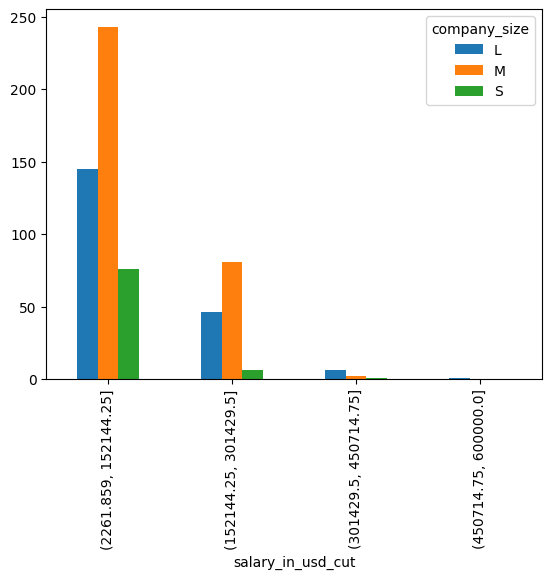

In [5]:
# diagram
import matplotlib.pyplot as plt
#data['salary_cut'].value_counts().plot(kind='bar')
data.groupby(['salary_in_usd_cut','company_size']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

In [6]:
def func(company_size=None, experience_level=None):
    pass

In [7]:
data = pd.read_csv("../../data/ds_salaries.csv")

data.replace({"experience_level": {'EN':10, 'MI':20,'SE':30, 'EX':40}},inplace=True)

data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,20,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,30,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,30,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,20,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,30,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,30,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,30,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,30,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,30,FT,Data Analyst,150000,USD,150000,US,100,US,M


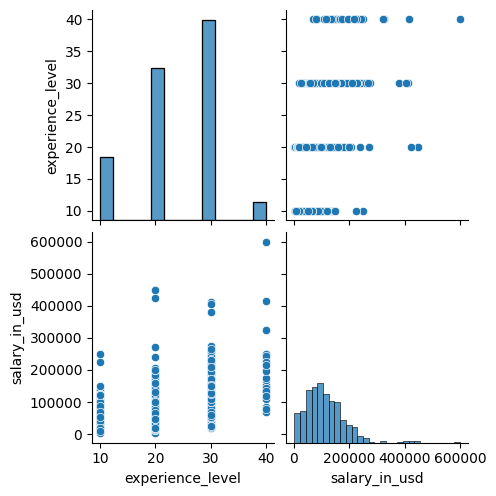

In [8]:
import seaborn

seaborn.pairplot(data[["experience_level", "salary_in_usd"]])

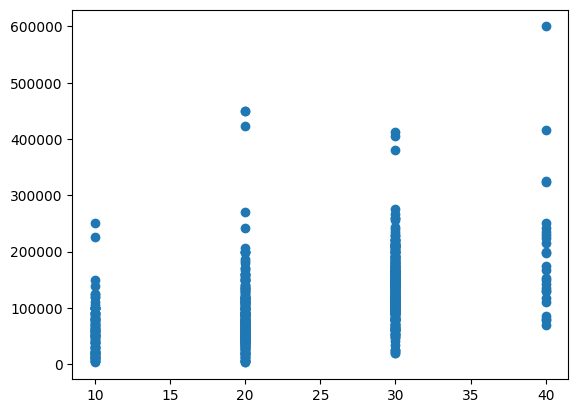

In [13]:
plt.scatter(data["experience_level"],data["salary_in_usd"])

In [10]:
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
enroll_data = data[["experience_level"]].values
target = data['salary_in_usd'].values
enroll_data_names = ['experience_level','salary_in_usd']
x,y = scale(enroll_data),target 
model = LinearRegression(normalize=True)
model.fit(x,y)
model.score(x,y)


C:\Users\leoni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.23448148805149394

In [11]:
# part 3
import pandas as pd
import numpy as np

In [12]:
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
shoppers = pd.DataFrame(shoppers).T
shop_prices = pd.DataFrame(shop_prices)

shoppers.dot(shop_prices)

,Netto,Fakta
Paula,127.00,83.75
Peter,166.25,110.50
Pandora,244.75,158.50
Pietro,102.50,116.25
